In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings("ignore")


In [2]:
DATA_FOLDER = os.path.join("..", "input", "gene-expression/")
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
sns.set_theme(style="darkgrid")
np.random.seed(42)


In [3]:
le = LabelEncoder()

In [4]:
train_data = pd.read_csv(f"C:\\Users\\pooja\\OneDrive\\Desktop\\archive\\data_set_ALL_AML_train.csv")
test_data = pd.read_csv(f"C:\\Users\\pooja\\OneDrive\\Desktop\\archive\\data_set_ALL_AML_independent.csv")
labels = pd.read_csv(f"C:\\Users\\pooja\\OneDrive\\Desktop\\archive\\actual.csv")

In [5]:
train_data.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [6]:
test_data.head()

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


In [7]:
print(f"Train data has {train_data.isna().sum().sum()} NAs")
print(f"Test data has {test_data.isna().sum().sum()} NAs")

Train data has 0 NAs
Test data has 0 NAs


In [8]:
cols_train = [col for col in train_data.columns if "call" in col]
cols_test = [col for col in test_data.columns if "call" in col]
train_data.drop(cols_train, axis=1, inplace=True)
test_data.drop(cols_test, axis=1, inplace=True)

In [9]:
train_data = train_data.T
test_data = test_data.T

In [10]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [11]:
train_data.columns = test_data.iloc[1].values
train_data.drop(["Gene Description", "Gene Accession Number"], axis=0, inplace=True)
test_data.columns = test_data.iloc[1].values
test_data.drop(["Gene Description", "Gene Accession Number"], axis=0, inplace=True)

In [12]:
train_data.head()

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [13]:
train_data["patient"] = train_data.index.values
test_data["patient"] = test_data.index.values

In [14]:
train_data = train_data.astype("int32")
test_data = test_data.astype("int32")

In [15]:
labels["cancer"] = le.fit_transform(labels["cancer"])
train_data = pd.merge(train_data, labels, on="patient")
test_data = pd.merge(test_data, labels, on="patient")

In [16]:
train_data["cancer"].value_counts()

0    27
1    11
Name: cancer, dtype: int64

In [17]:
test_data["cancer"].value_counts()

0    20
1    14
Name: cancer, dtype: int64

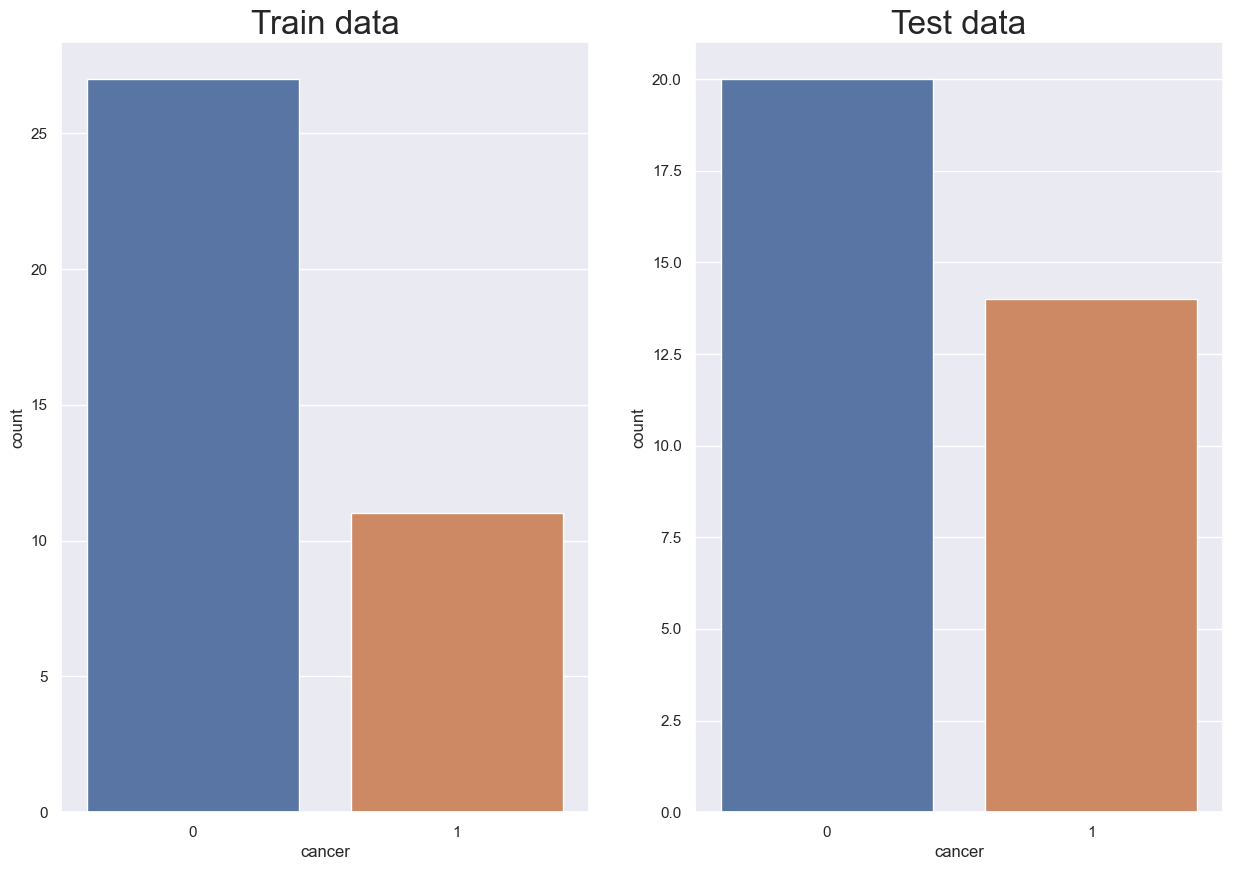

In [18]:
fig, axs = plt.subplots(1, 2)
sns.countplot(x="cancer", data=train_data, ax=axs[0])
axs[0].set_title("Train data", fontsize=24)
sns.countplot(x="cancer", data=test_data, ax=axs[1])
axs[1].set_title("Test data", fontsize=24)
plt.show()

In [19]:
upsampled_data = random.sample(train_data.query("cancer == 1")["patient"].index.to_list(), k=8, )

In [20]:
upsampled_data


[37, 28, 27, 35, 30, 36, 34, 29]

In [21]:
train_data_upsampled = pd.concat([train_data, train_data.iloc[upsampled_data, :]])

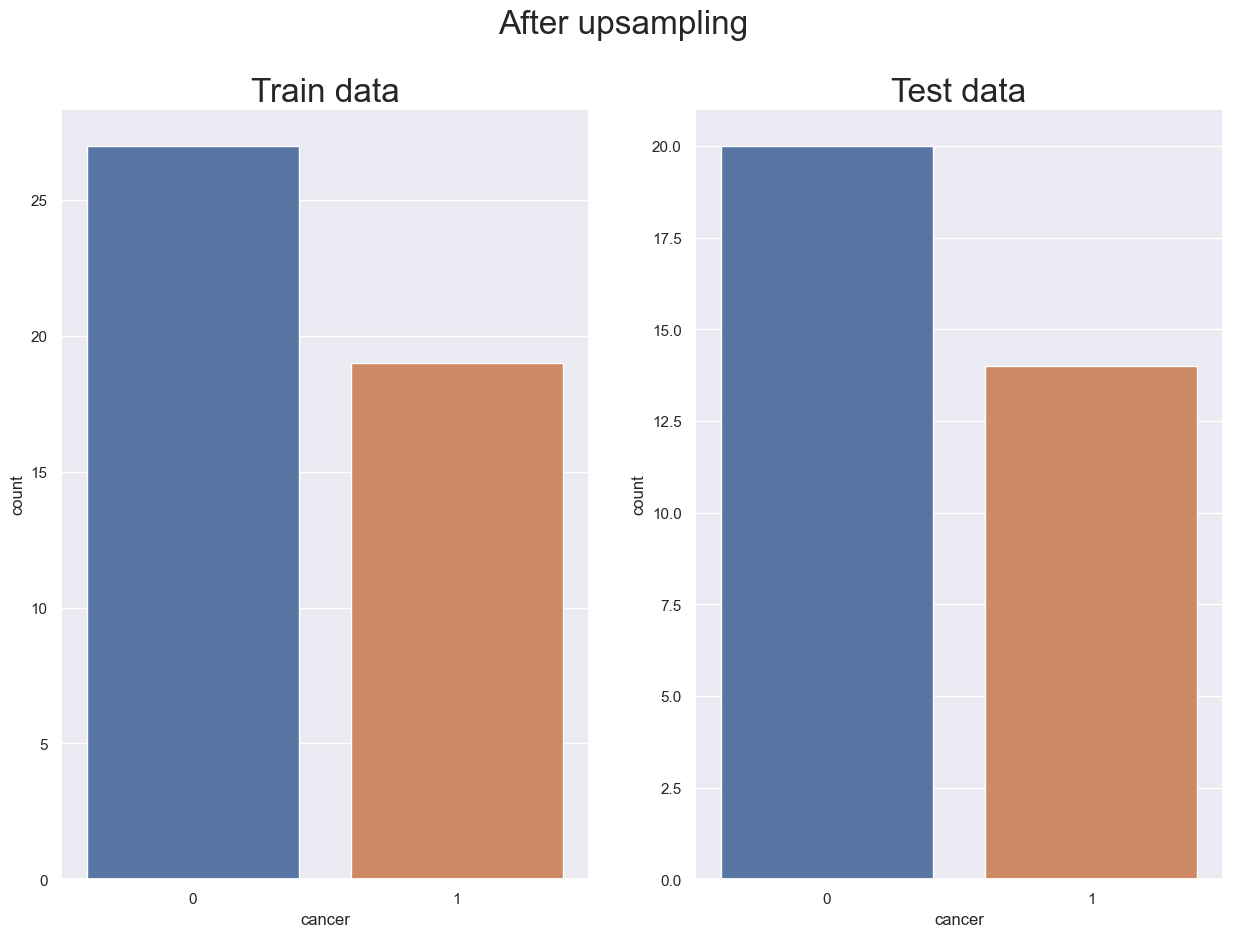

In [22]:
fig, axs = plt.subplots(1, 2)
sns.countplot(x="cancer", data=train_data_upsampled, ax=axs[0])
axs[0].set_title("Train data", fontsize=24)
sns.countplot(x="cancer", data=test_data, ax=axs[1])
axs[1].set_title("Test data", fontsize=24)
fig.suptitle("After upsampling", fontsize=24)
plt.show()

In [23]:
X_train = train_data_upsampled.drop(columns=["patient", "cancer"])
y_train = train_data_upsampled["cancer"]
X_test = test_data.drop(columns=["patient", "cancer"])
y_test = test_data["cancer"]

In [24]:
# Features scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [25]:
reduced_train = PCA().fit_transform(X_train_scaled)
kmeans = KMeans(n_clusters=2, n_init=20)
kmeans.fit(train_data_upsampled)

KMeans(n_clusters=2, n_init=20)

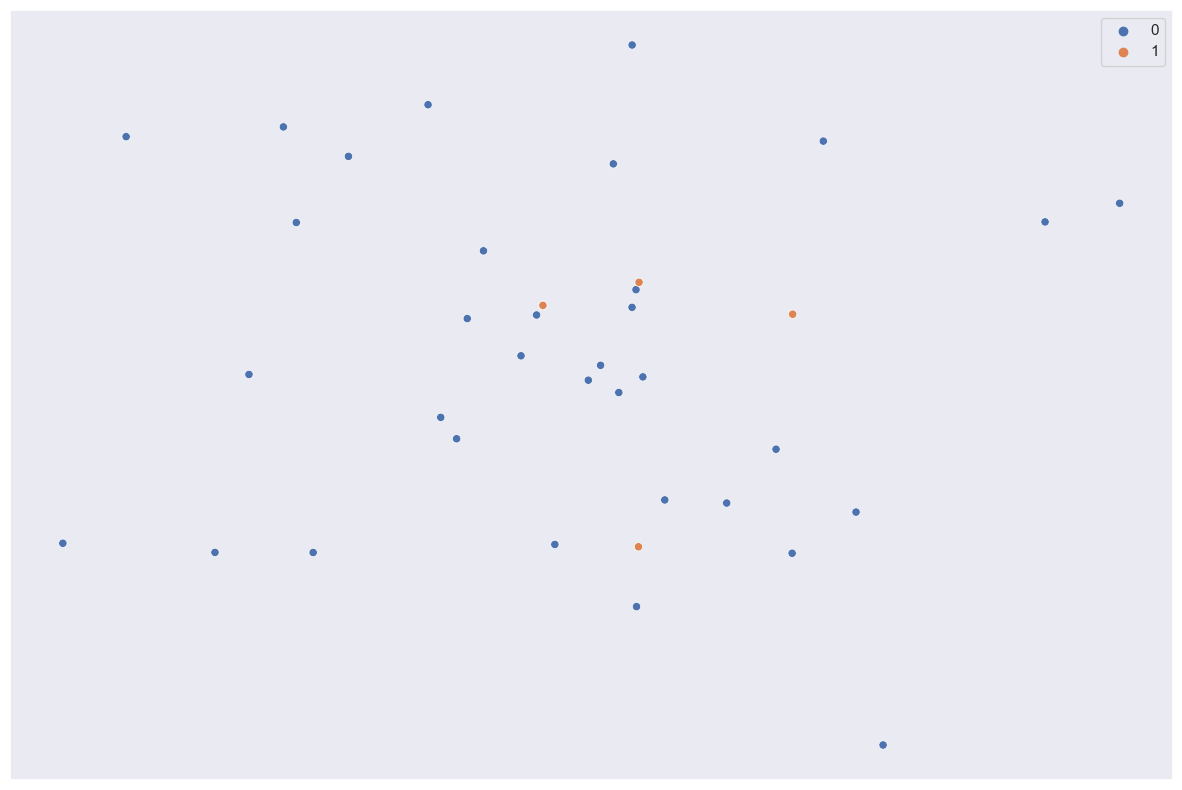

In [26]:
sns.scatterplot(x=reduced_train[0], y=reduced_train[1], hue=kmeans.labels_)
plt.xticks(())
plt.yticks(())
plt.show()

In [27]:
cancer_labels = train_data_upsampled["cancer"].map({0: le.classes_[0], 1: le.classes_[1]}).values
patient_labels = np.array(list(map(str, train_data_upsampled["patient"].values))).astype("object") + "_" + cancer_labels

Validation f1-score of RandomForest Classifier is 0.9285714285714286
Training Accuracy of RandomForest Classifier is 1.0
Testing Accuracy of RandomForest Classifier is 0.9411764705882353
Classification report :
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.93      0.93      0.93        14

    accuracy                           0.94        34
   macro avg       0.94      0.94      0.94        34
weighted avg       0.94      0.94      0.94        34



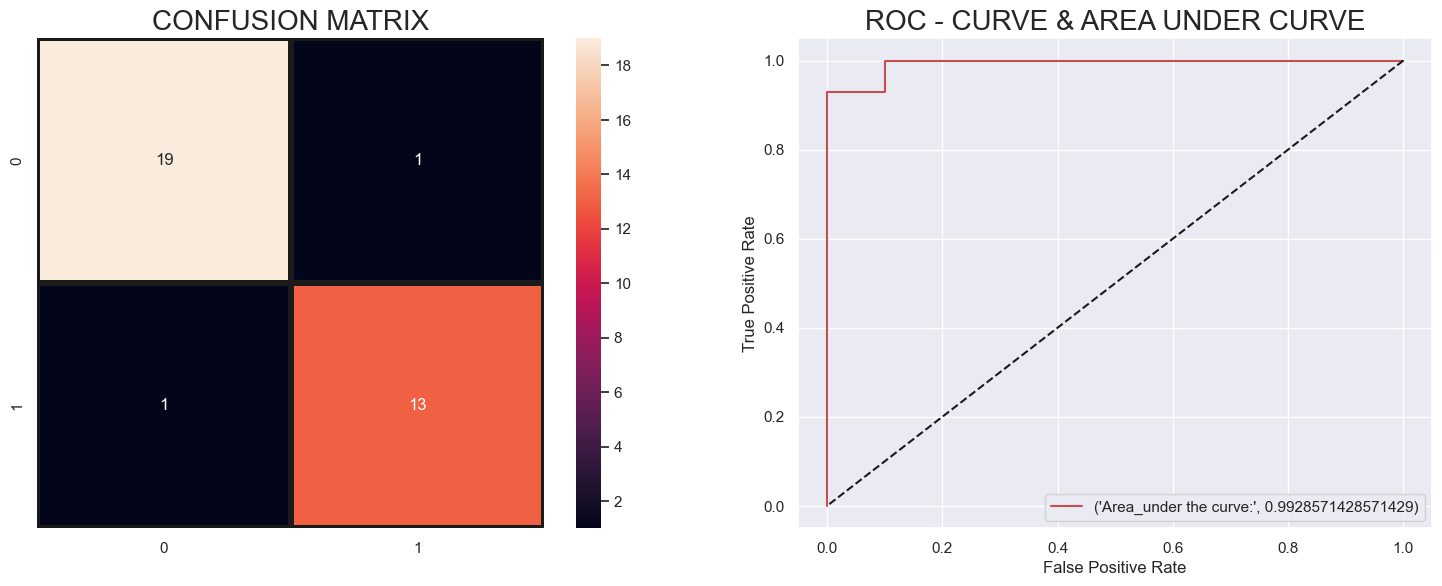

In [28]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score


# Perform feature selection 
selector = SelectFromModel(RandomForestClassifier())
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

rf_params = {
    "bootstrap": [False, True],
    "n_estimators": [60, 70, 80, 90, 100],
    "max_features": [0.6, 0.65, 0.7, 0.75, 0.8],
    "min_samples_leaf": [8, 10, 12, 14],
    "min_samples_split": [3, 5, 7]
}

rf_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=rf_params,
    scoring="f1",
    n_iter=100,
    cv=5,
    n_jobs=-1, 
    random_state=42
)

rf_search.fit(X_train_selected, y_train)
best_rf = rf_search.best_estimator_
rf_prediction = best_rf.predict(X_test_selected)

f1_score = metrics.f1_score(y_test, rf_prediction)
print('Validation f1-score of RandomForest Classifier is', f1_score)

train_prediction = best_rf.predict(X_train_selected)

train_accuracy = accuracy_score(y_train, train_prediction)
print('Training Accuracy of RandomForest Classifier is', train_accuracy)

test_accuracy = accuracy_score(y_test, rf_prediction)
print('Testing Accuracy of RandomForest Classifier is', test_accuracy)

print("Classification report :\n", metrics.classification_report(y_test, rf_prediction))

# Plot the confusion matrix
plt.figure(figsize=(18, 14))
plt.subplot(221)
sns.heatmap(metrics.confusion_matrix(y_test, rf_prediction), annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("CONFUSION MATRIX", fontsize=20)

rf_predicted_probs = best_rf.predict_proba(X_test_selected)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_predicted_probs)
plt.subplot(222)
plt.plot(fpr, tpr, label=("Area_under the curve:", metrics.auc(fpr, tpr)), color="r")
plt.plot([1,0], [1,0], linestyle="dashed", color="k")
plt.legend(loc="best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE", fontsize=20)
plt.show()


In [29]:
importances = best_rf.feature_importances_
importances.shape

(220,)

In [30]:
cols_idxs = selector.get_support(indices=True)

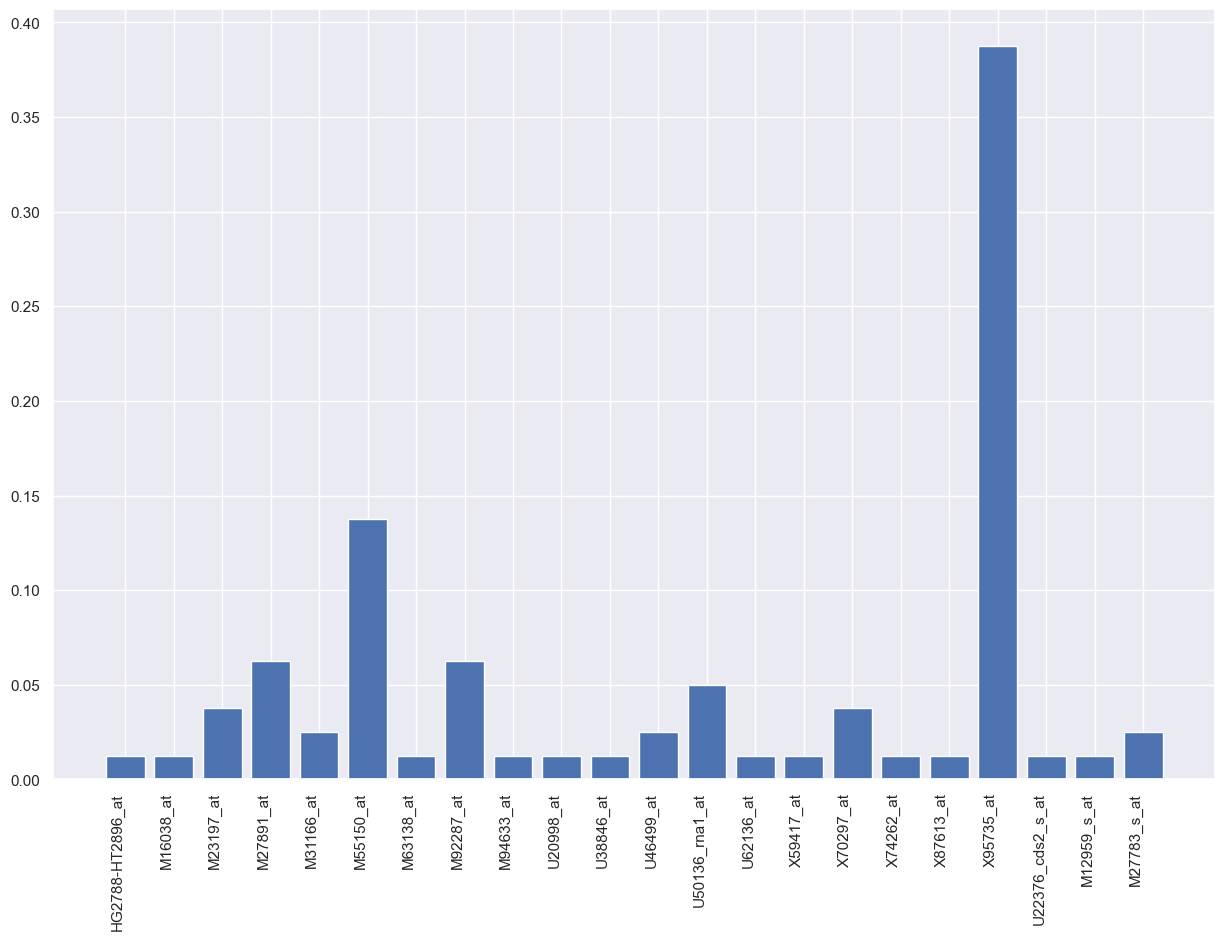

In [31]:
important_features=[]
for i,v in enumerate(importances):
    if v>0:
        important_features.append((X_train.columns[cols_idxs[i]],v))
# plot feature importance
important_features
plt.bar([important_features[i][0] for i in range(len(important_features))] ,[important_features[i][1] for i in range(len(important_features))])
plt.xticks(rotation=90, ha='right')
plt.show()

Naive Bayes Classifier:
Training Accuracy of Naive Bayes Classifier is 1.0
Testing Accuracy of Naive Bayes Classifier is 0.9411764705882353
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.88      1.00      0.93        14

    accuracy                           0.94        34
   macro avg       0.94      0.95      0.94        34
weighted avg       0.95      0.94      0.94        34



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE - Naive Bayes')

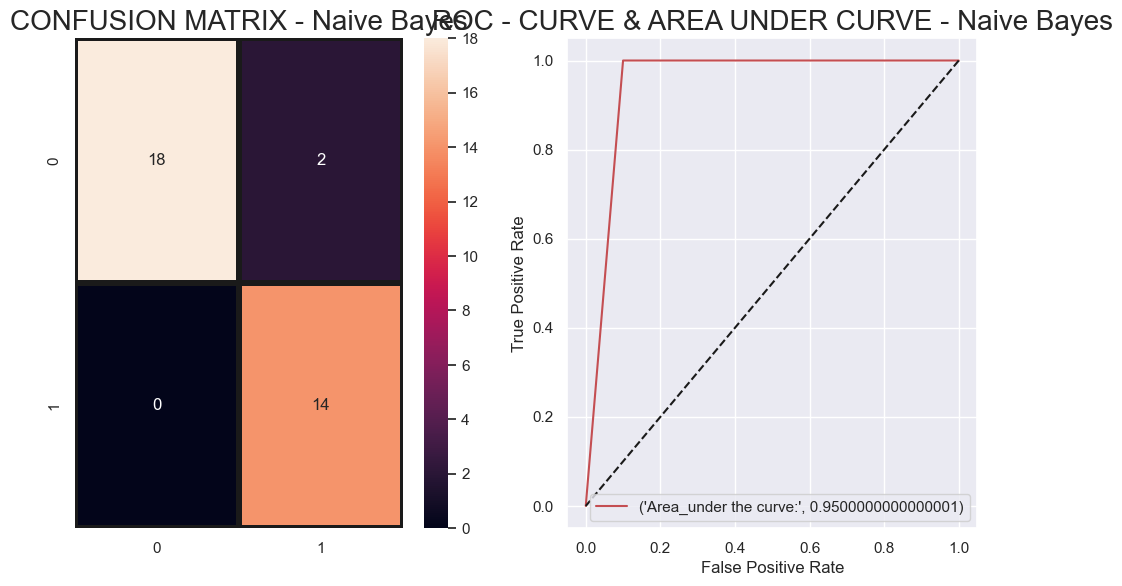

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Naive Bayes Classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train_selected, y_train)
nb_prediction = nb_clf.predict(X_test_selected)
nb_train_prediction = nb_clf.predict(X_train_selected)

print("Naive Bayes Classifier:")
nb_train_accuracy = accuracy_score(y_train, nb_train_prediction)
print('Training Accuracy of Naive Bayes Classifier is', nb_train_accuracy)

nb_test_accuracy = accuracy_score(y_test, nb_prediction)
print('Testing Accuracy of Naive Bayes Classifier is', nb_test_accuracy)

print("Classification report:\n", metrics.classification_report(y_test, nb_prediction))
plt.figure(figsize=(18, 14))
plt.subplot(231)
sns.heatmap(metrics.confusion_matrix(y_test, nb_prediction), annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("CONFUSION MATRIX - Naive Bayes", fontsize=20)
nb_predicted_probs = nb_clf.predict_proba(X_test_selected)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = metrics.roc_curve(y_test, nb_predicted_probs)
plt.subplot(232)
plt.plot(fpr_nb, tpr_nb, label=("Area_under the curve:", metrics.auc(fpr_nb, tpr_nb)), color="r")
plt.plot([1,0], [1,0], linestyle="dashed", color="k")
plt.legend(loc="best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE - Naive Bayes", fontsize=20)

Logistic Regression Classifier:
Training Accuracy of Logistic Regression Classifier is 1.0
Testing Accuracy of Logistic Regression Classifier is 0.9705882352941176
Classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.93      0.96        14

    accuracy                           0.97        34
   macro avg       0.98      0.96      0.97        34
weighted avg       0.97      0.97      0.97        34



Text(0, 0.5, 'True Positive Rate')

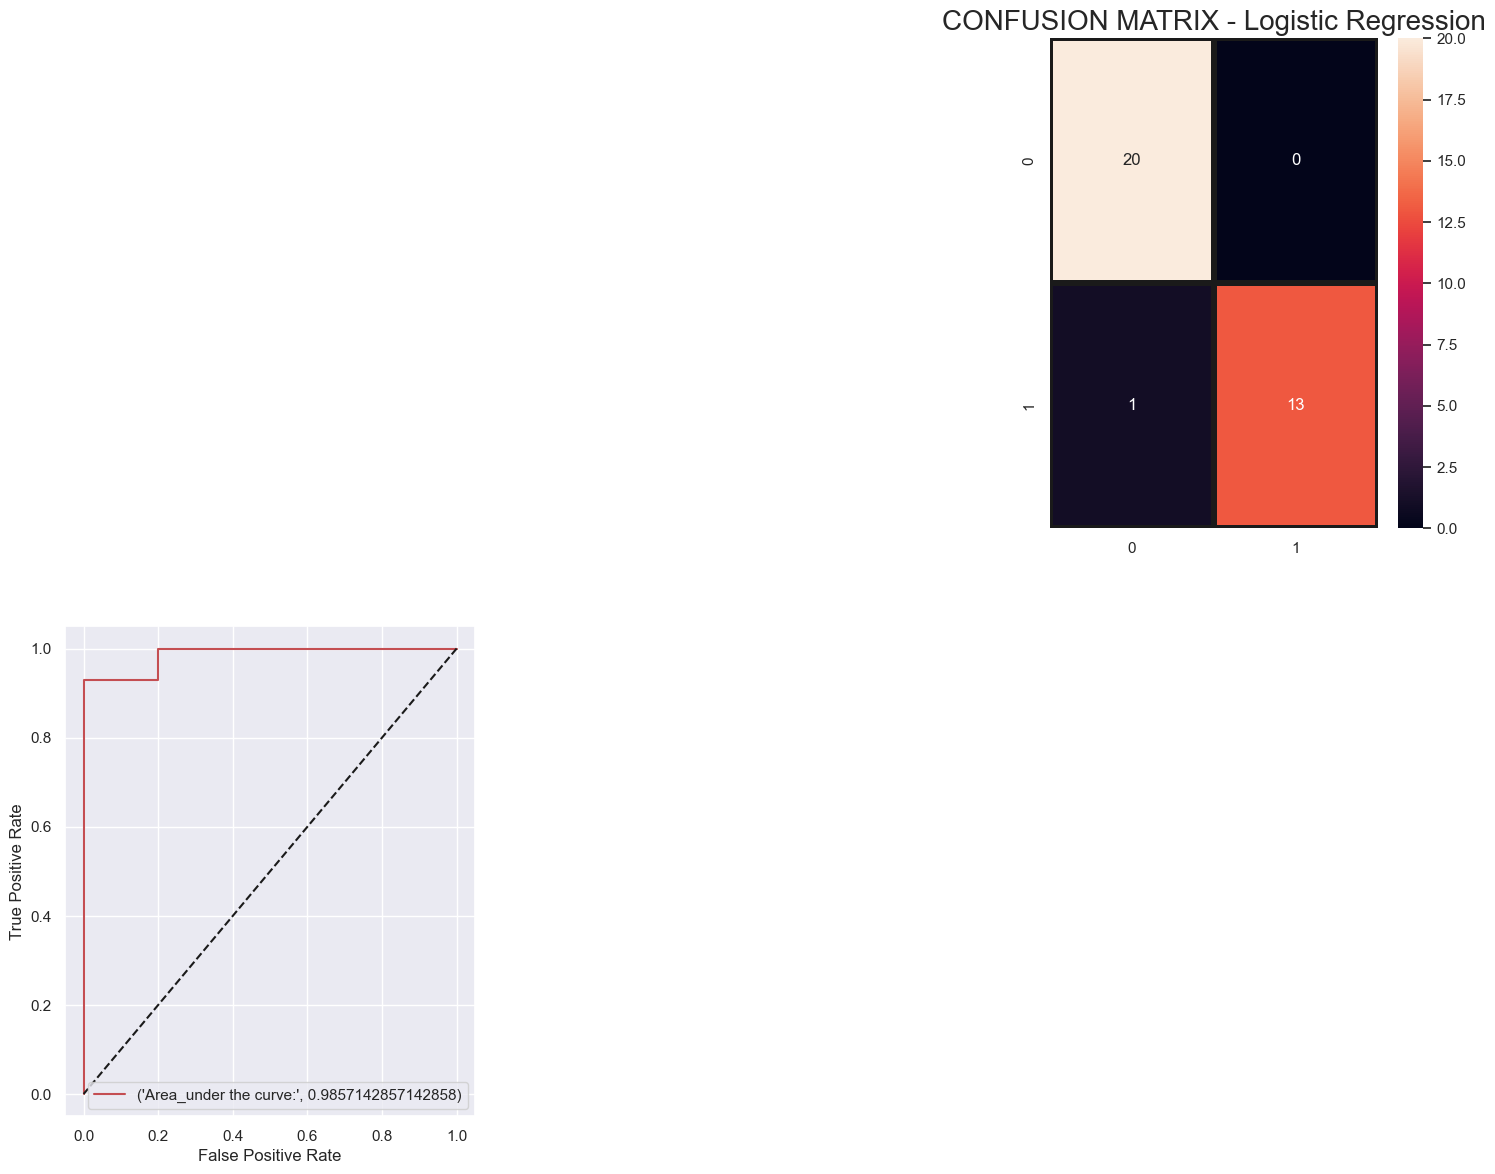

In [33]:
# Logistic Regression Classifier
log_reg_params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 1000, 5000]
}

log_reg_search = RandomizedSearchCV(
    estimator=LogisticRegression(),
    param_distributions=log_reg_params,
    scoring='f1',
    n_iter=100,
    cv=5,
    n_jobs=-1,
    random_state=42
)

log_reg_search.fit(X_train_selected, y_train)
best_log_reg = log_reg_search.best_estimator_
log_reg_prediction = best_log_reg.predict(X_test_selected)
print("Logistic Regression Classifier:")

log_reg_train_prediction = best_log_reg.predict(X_train_selected)

log_reg_train_accuracy = accuracy_score(y_train, log_reg_train_prediction)
print('Training Accuracy of Logistic Regression Classifier is', log_reg_train_accuracy)
log_reg_test_accuracy = accuracy_score(y_test, log_reg_prediction)
print('Testing Accuracy of Logistic Regression Classifier is', log_reg_test_accuracy)


print("Classification report:\n", metrics.classification_report(y_test, log_reg_prediction))
plt.figure(figsize=(18, 14))
plt.subplot(233)
sns.heatmap(metrics.confusion_matrix(y_test, log_reg_prediction), annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("CONFUSION MATRIX - Logistic Regression", fontsize=20)
log_reg_predicted_probs = best_log_reg.predict_proba(X_test_selected)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, log_reg_predicted_probs)
plt.subplot(234)
plt.plot(fpr_lr, tpr_lr, label=("Area_under the curve:", metrics.auc(fpr_lr, tpr_lr)), color="r")
plt.plot([1,0], [1,0], linestyle="dashed", color="k")
plt.legend(loc="best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Gradient Boosting Classifier:
Training Accuracy of Gradient Boosting Classifier is 1.0
Testing Accuracy of Gradient Boosting Classifier is 0.9117647058823529
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.87      0.93      0.90        14

    accuracy                           0.91        34
   macro avg       0.91      0.91      0.91        34
weighted avg       0.91      0.91      0.91        34



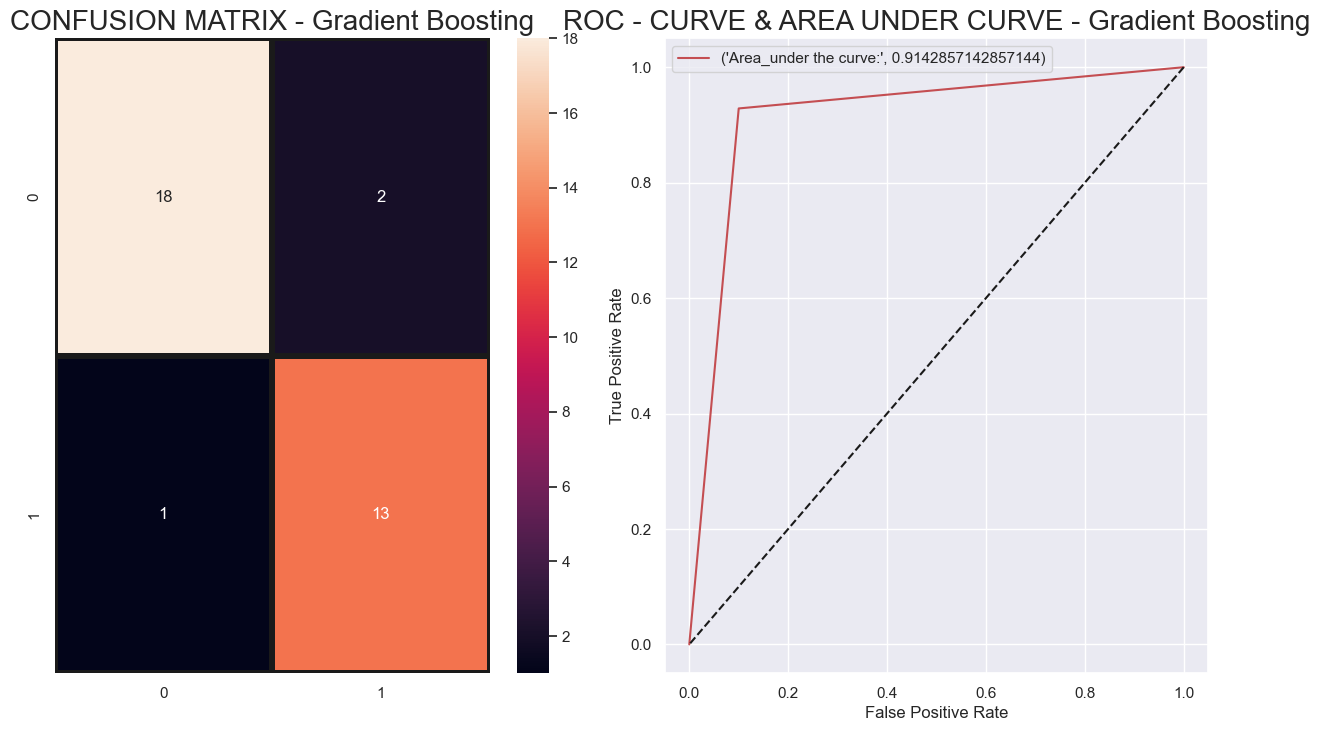

In [35]:
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7]
}

gb_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(),
    param_distributions=gb_params,
    scoring='f1',
    n_iter=100,
    cv=5,
    n_jobs=-1,
    random_state=42
)

gb_search.fit(X_train_selected, y_train)
best_gb = gb_search.best_estimator_
gb_prediction = best_gb.predict(X_test_selected)

print("Gradient Boosting Classifier:")

gb_train_prediction = best_gb.predict(X_train_selected)

gb_train_accuracy = accuracy_score(y_train, gb_train_prediction)
print('Training Accuracy of Gradient Boosting Classifier is', gb_train_accuracy)

gb_test_accuracy = accuracy_score(y_test, gb_prediction)
print('Testing Accuracy of Gradient Boosting Classifier is', gb_test_accuracy)

print("Classification report:\n", metrics.classification_report(y_test, gb_prediction))
plt.figure(figsize=(18, 14))
plt.subplot(235)
sns.heatmap(metrics.confusion_matrix(y_test, gb_prediction), annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("CONFUSION MATRIX - Gradient Boosting", fontsize=20)
gb_predicted_probs = best_gb.predict_proba(X_test_selected)[:, 1]
fpr_gb, tpr_gb, thresholds_gb = metrics.roc_curve(y_test, gb_predicted_probs)
plt.subplot(236)
plt.plot(fpr_gb, tpr_gb, label=("Area_under the curve:", metrics.auc(fpr_gb, tpr_gb)), color="r")
plt.plot([1,0], [1,0], linestyle="dashed", color="k")
plt.legend(loc="best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE - Gradient Boosting", fontsize=20)

plt.tight_layout()
plt.show()
